In [1]:
import pandas as pd
%matplotlib notebook

import matplotlib.pyplot as plt

In [2]:
#Data download from Zillow Research (https://www.zillow.com/research/data/)
df = pd.read_csv("City_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_mon.csv")

In [3]:
GA = df[df['State'] == 'GA'].sort_values(by = 'SizeRank')

In [4]:
top10index = GA.loc[:, '2010-01-31':'2020-05-31'].mean(axis=1).sort_values(ascending = False).head(10).index.tolist()
index = top10index + GA[GA['RegionName'] == 'Decatur'].index.tolist()
index

[18948, 23828, 4424, 1411, 8819, 1055, 11728, 382, 10532, 1162, 1032]

In [5]:
top10data = df.iloc[top10index].set_index('RegionName').loc[:, '2010-01-31':'2020-05-31']
Decaturdata = GA[GA['RegionName'] == 'Decatur'].set_index('RegionName').loc[:, '2010-01-31':'2020-05-31']

In [8]:
legends = top10data.index.tolist() + Decaturdata.index.tolist()
legends

['Sea Island',
 'Vernonburg',
 'Druid Hills',
 'Milton',
 'Skidaway Island',
 'Brookhaven',
 'Berkeley Lake',
 'Sandy Springs',
 'Tybee Island',
 'Dunwoody',
 'Decatur']

<IPython.core.display.Javascript object>


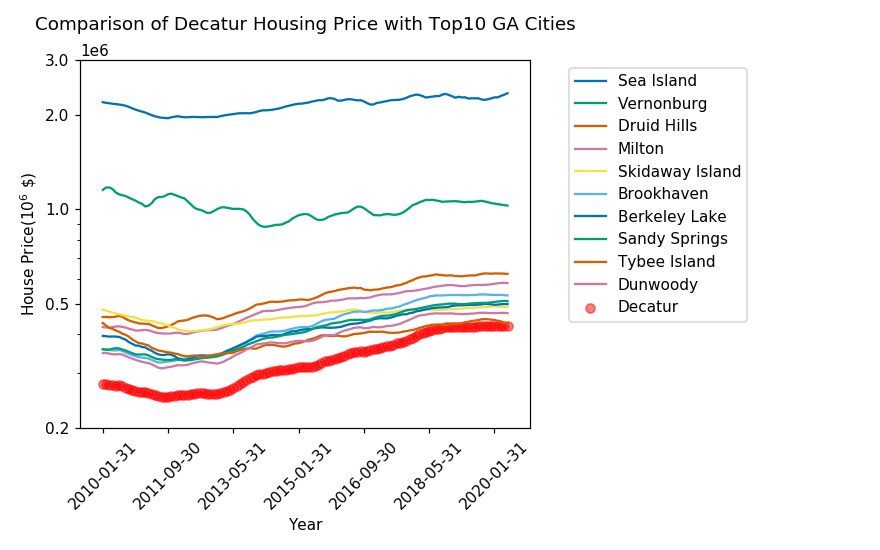

In [7]:
plt.style.use('seaborn-colorblind')

top10data.T.plot(figsize=(8, 5)).set_yscale('log')
plt.scatter(Decaturdata.T.index, Decaturdata.T, c='red', alpha=0.5)


plt.legend(legends, bbox_to_anchor=(1.5, 1.0), loc='upper right')
#plt.legend(bbox_to_anchor=(15, 1.0), loc='upper left')
plt.gca().set_title('Comparison of Decatur Housing Price with Top10 GA Cities', pad = 20)
plt.gca().set_ylabel('House Price($10^6\ \$$)')
plt.gca().set_xlabel('Year')
    
plt.gca().set_ylim([200000, 3000000])

plt.gca().set_yticks([2e5, 5e5, 1e6, 2e6, 3e6])
import matplotlib.ticker
plt.gca().get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

x = plt.gca().xaxis
# rotate the tick labels for the x axis
for item in x.get_ticklabels():
    item.set_rotation(45)
    
# adjust the subplot so the text doesn't run off the image
#plt.subplots_adjust(left=0.15,bottom=0.15)
plt.tight_layout()

plt.savefig('result.png')